<a href="https://colab.research.google.com/github/Tuna10001/Assignments-on-remote-sensing-and-water-quality-data-analysis/blob/main/R_sensing_assignment_Tuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REMOTE SENSING COURSE

STUDENT NAME : ISAQ M. TUNA




Assignment 2: Remote Sensing Data Processing and Analysis in Google Colab

Case Study Area:  Narok County, Kenya]
Selected Data Type: [ERA5 2-meter air temperature]

Description: The assignment focuses on the acquisition, preprocessing, and analysis of 2m air temperature data from the Copernicus Climate Data Store. for Narok county using python.

Downloading 2m temperature data with API from 2000-2025. Will zip it in  file; (reanalysis-era5-land-monthly-means)

## Installing necessary files and the cdsapirc file

---


In [ ]:
# Installing necessary files
!pip install 'cdsapi>=0.7.2' --quiet
!pip3 install netcdf4 xarray --quiet
!pip3 install rioxarray --quiet
!pip3 install geopandas --quiet

In [ ]:
# Upload the .cdsapirc file
from google.colab import files
uploaded = files.upload()

# Move it to the home directory
import shutil
shutil.move(".cdsapirc", "/root/.cdsapirc")


Saving .cdsapirc to .cdsapirc


'/root/.cdsapirc'

In [ ]:
# importing packages
import xarray as xr
import rioxarray as rio
import os
import geopandas as gpd
import shutil
import cdsapi
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
from contextlib import closing
import requests

In [ ]:
import cdsapi

# credentials from https://cds.climate.copernicus.eu/api-how-to
cds = cdsapi.Client(
    url='https://cds.climate.copernicus.eu/api',
    key='API KEY'  # Replace here with your CDS API key
)


2025-04-25 11:28:38,496 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.legacy_api_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-04-25 11:28:38,499 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


In [ ]:
#Downloading data from ERA5
import cdsapi
import ssl

dataset = "reanalysis-era5-land-monthly-means"
request = {
    "product_type": ["monthly_averaged_reanalysis"],
    "variable": ["2m_temperature"],
    "year": [

        "2000", "2001",
        "2002", "2003", "2004",
        "2005", "2006", "2007",
        "2008", "2009", "2010",
        "2011", "2012", "2013",
        "2014", "2015", "2016",
        "2017", "2018", "2019",
        "2020", "2021", "2022",
        "2023", "2024"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "zip",
    "area": [-0.45424786599994604, 34.989317147000065, -2.1045807399999603, 36.347782135000045]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()

2025-04-25 11:29:40,224 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.legacy_api_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-04-25 11:29:40,228 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-04-25 11:29:40,807 INFO Request ID is 195a89f3-8882-490e-897b-1a6aa73dd561
INFO:datapi.legacy_api_client:Request ID is 195a89f3-8882-490e-897b-1a6aa73dd561
2025-04-25 11:29:41,204 INFO status has been updated to accepted
INFO:datapi.legacy_api_client:status has been updated to accepted
2025-04-25 11:29:50,864 INFO status has been updated to running
INFO:datapi.legacy_api_client:status has been upd

5906690f5dd63ee8f6008cf5ddac6c31.zip:   0%|          | 0.00/179k [00:00<?, ?B/s]

'5906690f5dd63ee8f6008cf5ddac6c31.zip'

In [ ]:
import zipfile

# Replacing filename
with zipfile.ZipFile("reanalysis-era5-land-monthly-means.zip", 'r') as zip_ref:
    zip_ref.extractall("era5_data")

# Listing contents
import os
os.listdir("era5_data")


['data_stream-moda.nc']

Checking the content of the NETCDF files dowloaded

In [ ]:
import xarray as xr

# Opening the NetCDF file
ds = xr.open_dataset("era5_data/data_stream-moda.nc")
ds


<xarray.Dataset> Size: 293kB
Dimensions:     (valid_time: 300, latitude: 17, longitude: 14)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 2kB 2000-01-01 ... 2024-12-01
  * latitude    (latitude) float64 136B -0.504 -0.604 -0.704 ... -2.004 -2.105
  * longitude   (longitude) float64 112B 34.99 35.09 35.19 ... 36.09 36.19 36.29
    expver      (valid_time) <U4 5kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 286kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-25T09:46 GRIB to CDM+CF via cfgrib-0.9.1...

Converting temperature values from Kelvin to Degree celcius and ploting

Text(0.5, 1.0, '')

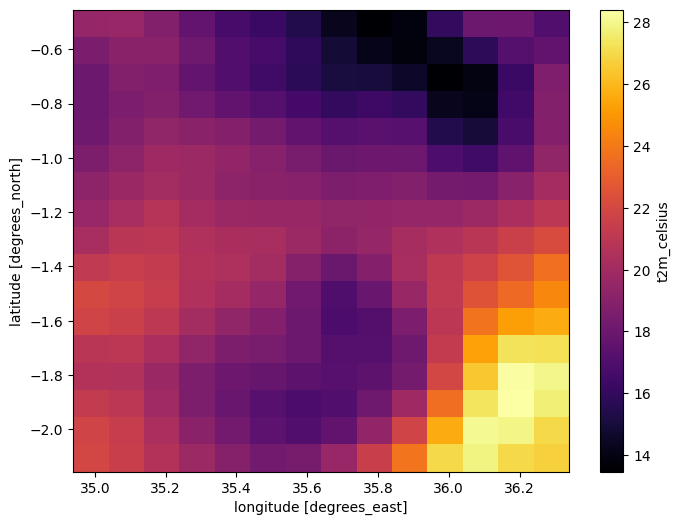

In [ ]:
ds['t2m_celsius'] = ds['t2m'] - 273.15
ds['t2m_celsius'].isel(valid_time=0).plot(cmap="inferno", figsize=(8, 6))
plt.title("")


Overlaying  the Narok shapefile polygon

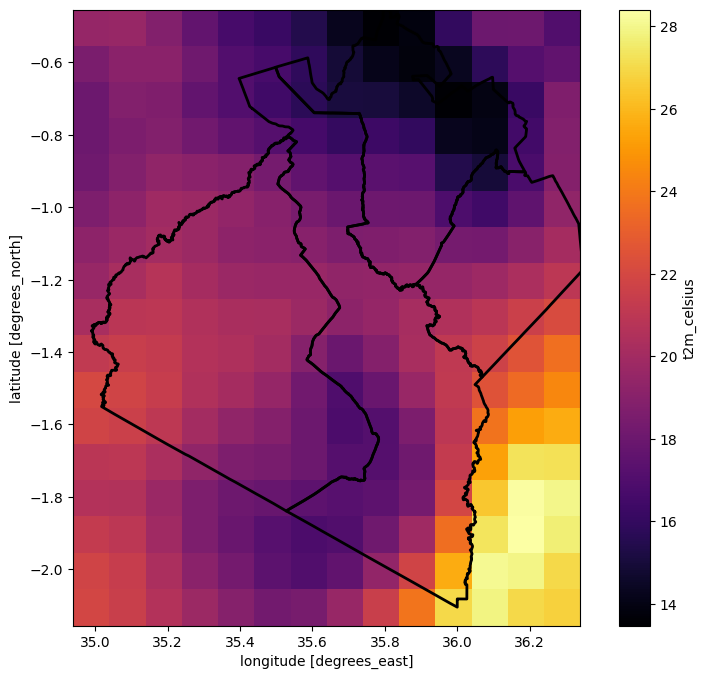

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Loading Narok County shapefile
narok = gpd.read_file("/content/Narok_County.shp")

# Converting the shapefile CRS to match your dataset's CRS (important!)
narok = narok.to_crs(ds.rio.crs)

# Plotting the temperature data
fig, ax = plt.subplots(figsize=(10, 8))
ds['t2m_celsius'].isel(valid_time=0).plot(ax=ax, cmap='inferno', add_colorbar=True)
plt.title("")  # remove default title

# Overlaying the shapefile
narok.boundary.plot(ax=ax, edgecolor='black', linewidth=2)

plt.show()


Clipping the data to Narok shapefile

In [ ]:
import xarray as xr
import geopandas as gpd
import rioxarray

# Load ERA5 temperature data
ds = xr.open_dataset("era5_data/data_stream-moda.nc")
ds['t2m_celsius'] = ds['t2m'] - 273.15

# Prepare temperature for spatial clipping
# Set CRS on the dataset coordinates instead of the data variable:
ds = ds.rio.set_spatial_dims(x_dim="longitude", y_dim="latitude")
ds = ds.rio.write_crs("EPSG:4326")

# Load shapefile (Narok)
aoi = gpd.read_file("Narok_County.shp")
aoi = aoi.to_crs("EPSG:4326")

# Clip
t2m_clipped = ds['t2m_celsius'].rio.clip(aoi.geometry.values, aoi.crs, all_touched=True, drop=True)

Aggregation of temperature data and plotting timeseries over Narok area

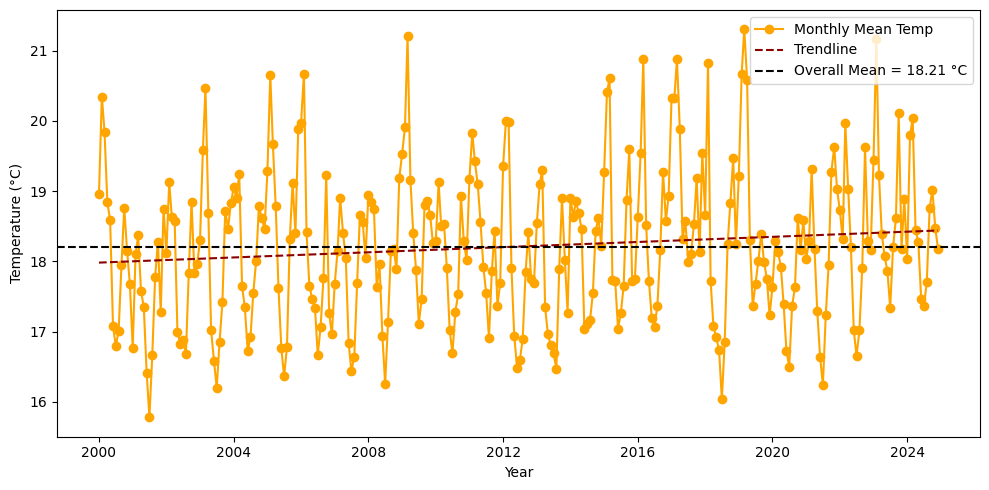

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert xarray DataArray to pandas DataFrame
df = narok_monthly_temp.to_dataframe().reset_index()

# Optional: 3-month rolling average
df['rolling'] = df['t2m_celsius'].rolling(window=3, center=True).mean()

# Extract time and temperature values
dates = pd.to_datetime(df['valid_time'])
temps = df['t2m_celsius'].values

# Calculate overall mean temp
mean_temp = np.mean(temps)

# Fit linear trendline
x = np.arange(len(temps))  # numeric x-axis for regression
coeffs = np.polyfit(x, temps, deg=1)
trend = np.poly1d(coeffs)

# Plot everything
fig, ax = plt.subplots(figsize=(10, 5))

# Original data
ax.plot(dates, temps, marker='o', label='Monthly Mean Temp', color='orange')

# Trendline
ax.plot(dates, trend(x), label='Trendline', color='darkred', linestyle='--')

# Horizontal mean line
ax.axhline(mean_temp, color='black', linestyle='--', label=f'Overall Mean = {mean_temp:.2f} °C')

# Labels and legend
ax.set_ylabel("Temperature (°C)")
ax.set_xlabel("Year")
ax.legend()
ax.grid(False)
plt.tight_layout()
plt.show()



In [ ]:
df_temp = narok_monthly_temp.to_dataframe().reset_index()
df_temp.to_csv("narok_monthly_temperature.csv", index=False)

# Optional: download to local machine
from google.colab import files
files.download("narok_monthly_temperature.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Computing zonal statistics and plotting

In [ ]:
!pip install rasterstats geopandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 58.3 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
from rasterstats import zonal_stats
import pandas as pd
import rioxarray
import os

# Load shapefile (again, if needed)
gdf = gpd.read_file("/content/Narok_County.shp")
gdf = gdf.to_crs("EPSG:4326")

# Make folder to save temporary rasters
os.makedirs("monthly_tiffs", exist_ok=True)

# List to collect results
zonal_results = []

# Loop over all time slices (months) using the 'valid_time' dimension instead of 'time'
for i, time_val in enumerate(t2m_clipped['valid_time'].values):  # Changed to t2m_clipped['valid_time'].values
    # Extract single month as GeoTIFF
    tiff_path = f"monthly_tiffs/temp_{i}.tif"
    single_month = t2m_clipped.isel(valid_time=i)  # Changed to isel(valid_time=i)
    single_month.rio.to_raster(tiff_path)

    # Run zonal stats

    stats = zonal_stats(
    gdf,
    tiff_path,
    stats=["mean"],
    geojson_out=True,
    all_touched=True  # ← this fixes the under-coverage issue
)

    # Convert to DataFrame
    df = gpd.GeoDataFrame.from_features(stats)
    df["time"] = pd.to_datetime(str(time_val))
    zonal_results.append(df)

# Combine all months
zonal_df = pd.concat(zonal_results, ignore_index=True)

# Clean and preview
zonal_df = zonal_df.drop(columns="geometry")
zonal_df.rename(columns={"mean": "temp_celsius"}, inplace=True)
zonal_df.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo,temp_celsius,time
0,1.910458,0.166314,Narok East,KE033180,None,None,None,Narok,KE033,Kenya,KE,2017-11-03,2019-10-31,None,18.003631,2000-01-01
1,3.340003,0.221277,Narok North,KE033179,None,None,None,Narok,KE033,Kenya,KE,2017-11-03,2019-10-31,None,16.092590,2000-01-01
2,4.923140,0.392638,Narok South,KE033181,None,None,None,Narok,KE033,Kenya,KE,2017-11-03,2019-10-31,None,19.375407,2000-01-01
3,3.792059,0.442619,Narok West,KE033182,None,None,None,Narok,KE033,Kenya,KE,2017-11-03,2019-10-31,None,19.416515,2000-01-01
4,1.910458,0.166314,Narok East,KE033180,None,None,None,Narok,KE033,Kenya,KE,2017-11-03,2019-10-31,None,19.346443,2000-02-01


In [ ]:
zonal_df.to_csv("narok_zonal_temperature.csv", index=False)

# Download
from google.colab import files
files.download("narok_zonal_temperature.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

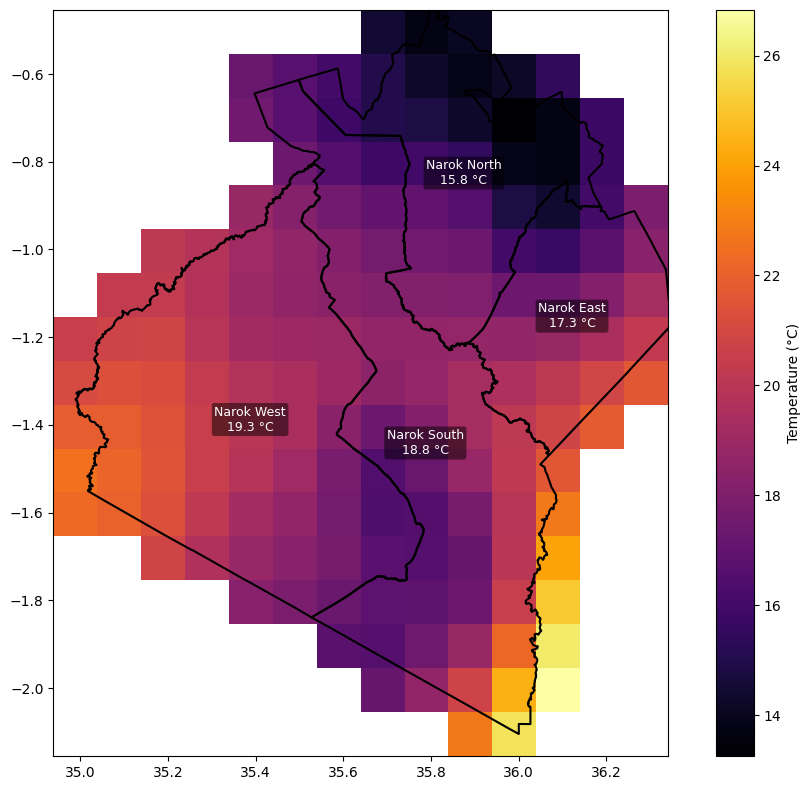

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager as fm


# Replace with your actual sub-county name column
zone_column = "ADM2_EN"  # <-- CHANGE THIS if needed

# Select one month's temperature raster
month_idx = 4
temp_data = t2m_clipped.isel(valid_time=month_idx)

# Save temporary GeoTIFF for zonal stats
tiff_path = f"temp_month_{month_idx}.tif"
temp_data.rio.to_raster(tiff_path)

# Compute zonal stats with labels
from rasterstats import zonal_stats
import geopandas as gpd
import pandas as pd

# Reproject if needed
aoi = aoi.to_crs("EPSG:4326")

# Get zonal stats with touching pixels
zstats = zonal_stats(aoi, tiff_path, stats=["mean"], geojson_out=True, all_touched=True)

# Convert to GeoDataFrame
stats_gdf = gpd.GeoDataFrame.from_features(zstats).set_crs("EPSG:4326")

# Merge back sub-county names from original shapefile
stats_gdf[zone_column] = aoi[zone_column].values  # Pull in real names
stats_gdf["mean_temp"] = stats_gdf["mean"].round(1)
stats_gdf["label"] = stats_gdf[zone_column] + "\n" + stats_gdf["mean_temp"].astype(str) + " °C"

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot raster map without xarray’s automatic title
temp_data.plot(ax=ax, cmap="inferno", cbar_kwargs={'label': 'Temperature (°C)'}, add_labels=False)
ax.set_title("")  # remove the default title

# Plot boundaries
aoi.boundary.plot(ax=ax, edgecolor='black', linewidth=1.5)

# Annotate each zone with name + mean temperature
for idx, row in stats_gdf.iterrows():
    if row.geometry.centroid.is_empty:
        continue
    x, y = row.geometry.centroid.coords[0]
    ax.text(
        x, y, row["label"],
        ha='center', va='center',
        fontsize=9,
        color='white',
        bbox=dict(facecolor='black', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.5)
    )

# Title and formatting
plt.tight_layout()
plt.show()


Contour line and gradient visualization of temperature data

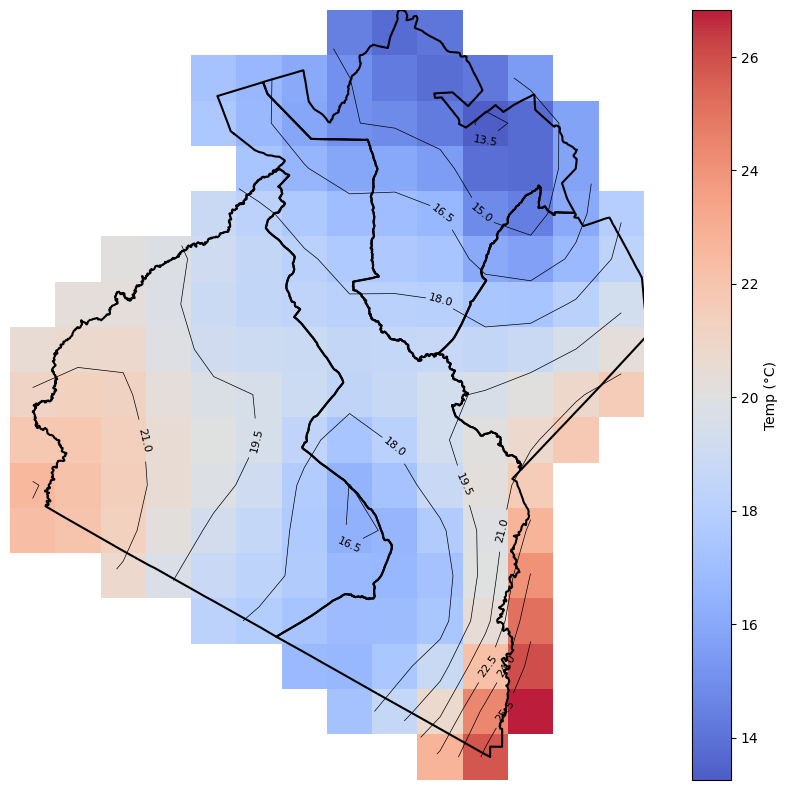

In [ ]:
import matplotlib.pyplot as plt

# Select month
month_idx = 4
data = t2m_clipped.isel(valid_time=month_idx)

# Smooth map with contour lines
fig, ax = plt.subplots(figsize=(10, 8))

# Pseudocolor map without labels
im = data.plot(ax=ax, cmap="coolwarm", alpha=0.9, add_colorbar=False, add_labels=False)

# Overlay contour lines (smoothed)
cs = ax.contour(
    data.longitude,
    data.latitude,
    data.values,
    levels=10,
    colors='black',
    linewidths=0.5
)

ax.clabel(cs, inline=True, fontsize=8)

# Add AOI boundaries
aoi.boundary.plot(ax=ax, edgecolor='black', linewidth=1.5)

# Optional title (or comment out to remove)
ax.set_title("")  # remove or replace with custom title

# Add colorbar
plt.colorbar(im, ax=ax, label="Temp (°C)")

# Optional: Hide axis ticks/labels
plt.axis("off")

plt.tight_layout()
plt.show()



In [ ]:
!zip -r assignment_package.zip . -x "/content/sample_data/*"


  adding: .config/ (stored 0%)
  adding: .config/gce (stored 0%)
  adding: .config/.last_update_check.json (deflated 23%)
  adding: .config/configurations/ (stored 0%)
  adding: .config/configurations/config_default (deflated 15%)
  adding: .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
  adding: .config/.last_opt_in_prompt.yaml (stored 0%)
  adding: .config/config_sentinel (stored 0%)
  adding: .config/default_configs.db (deflated 98%)
  adding: .config/.last_survey_prompt.yaml (stored 0%)
  adding: .config/active_config (stored 0%)
  adding: .config/logs/ (stored 0%)
  adding: .config/logs/2025.04.23/ (stored 0%)
  adding: .config/logs/2025.04.23/13.39.17.778447.log (deflated 56%)
  adding: .config/logs/2025.04.23/13.39.08.705092.log (deflated 58%)
  adding: .config/logs/2025.04.23/13.38.55.951136.log (deflated 57%)
  adding: .config/logs/2025.04.23/13.39.04.100569.log (deflated 87%)
  adding: .config/logs/2025.04.23/13.38.26.733387.log (deflate

In [ ]:
from google.colab import files
files.download("assignment_package.zip")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>